# Support Vector Regression (SVR)

## Importing libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [43]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [44]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values
print(X, y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [45]:
y = y.reshape((len(y),1))

## Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

## Training the SVR model on the whole dataset

In [47]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X, y)

/home/wloszynski/Python/Environments/z2m/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting a new result

In [48]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))



array([170370.0204065])

## Visualizing the SVR results

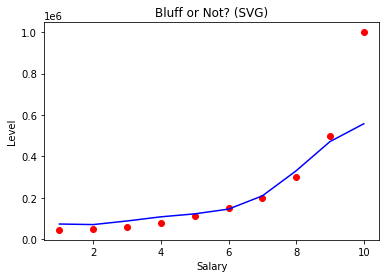

In [64]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Bluff or Not? (SVG)')
plt.xlabel('Salary')
plt.ylabel('Level');

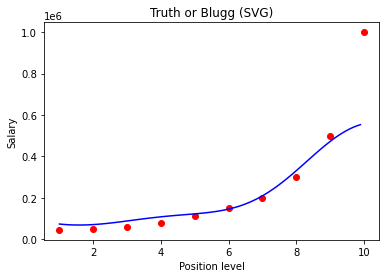

In [79]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Blugg (SVG)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
